Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [35]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-14 17:21:24--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-14 17:21:24--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv.2’

Mall_Customers.csv. 100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-14 17:21:24 (55.7 MB/s) -



Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [37]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


####Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

####Respuesta:
- CustomerID: Identificador único por cliente. Es útil para identificar a clientes individuales pero no es relevante para la segmentación.
- Gender: Género del cliente. Es una variable útil en el análisis.
- Age: Representa la edad del cliente en años, influye en el comportamiento de compra.
- Annual Income (k$): Ingreso anual por cliente en miles de dólares. Esta información es clave para entender la capacidad de gasto.
- Spending Score (1–100): Puntaje basado en el comportamiento de gasto,donde un puntaje más alto (cercano a 100) muestra un mayor gasto. Esta variable es esencial para identificar patrones de compra.

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [40]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [41]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [42]:
x = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']]

In [43]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

####Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.

####Respuesta:
Es importante normalizar los datos antes de aplicar K-means porque este algoritmo es sensible a la escala. Si las variables tienen diferentes unidades, las de mayor rango dominarán el análisis. La normalización transforma los datos para que tengan media 0 y desviación estándar 1, permitiendo que todas las variables influyan por igual en la formación de los clusters. Esto mejora la precisión y representatividad del agrupamiento.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


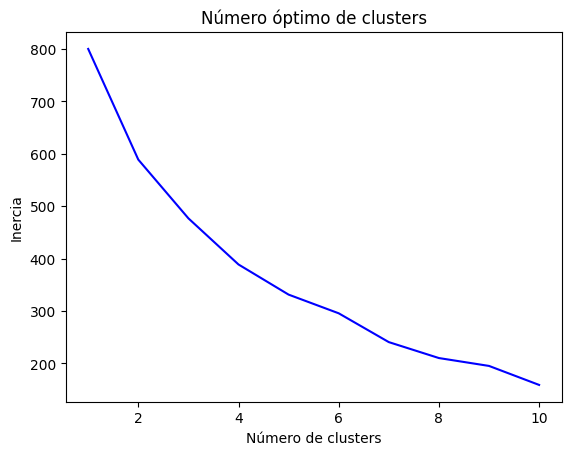

In [44]:
inertia = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia,color="blue")
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Número óptimo de clusters')
plt.show()

####Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

####Respuesta:
Observando la gráfica del método del codo el punto donde la curva comienza a aplanarse, es decir, donde la disminución de la inercia deja de ser tan marcada, parece estar en 5 clusters.
Esto indica que 5 es un número apropiado de clusters para este ejercicio, ya que agregar más clusters a partir de ese punto no reduce significativamente la inercia y no mejora mucho los resultados del agrupamiento.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [45]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(x_scaled)

In [46]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,4
2,3,1,20,16,6,2
3,4,1,23,16,77,1
4,5,1,31,17,40,1


In [47]:
data['Cluster'].value_counts()

,count
Cluster,
1,57
2,55
4,41
0,28
3,19


####Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

####Respuesta:
En los resultados se puede obsevar que se han segmentado los 200 clientes en 5 grupos distintos etiquetados del 0 al 4. La distribución no es uniforme lo que significa que algunos grupos tienen muchos más clientes que otros. Por ejemplo, los clusters 1 y 2 son los más grandes, mientras que el cluster 3 es el más pequeño. Esta diferencia muestra que hay ciertos perfiles de clientes más comunes que otros.

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [48]:
cluster_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        57.214286           46.785714               38.714286
1        28.438596           59.666667               67.684211
2        48.109091           58.818182               34.781818
3        38.473684           85.894737               14.210526
4        28.536585           61.804878               71.097561


####Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?

####Respuesta:
Los resultados muestran diferencias claras entre los clusters en términos de edad, ingreso y puntaje de gasto. El cluster 0 agrupa a personas mayores con ingresos moderados y gasto medio-bajo. El cluster 1 representa a jóvenes con ingresos medio-altos y alto gasto, mientras que el cluster 2 incluye adultos con ingresos estables pero bajo nivel de gasto. El cluster 3 está compuesto por clientes de mediana edad con altos ingresos pero muy bajo gasto. Finalmente, el cluster 4 destaca por incluir a jóvenes con ingresos altos y un nivel de gasto muy elevado. Esta segmentación permite identificar distintos perfiles de clientes y diseñar estrategias más efectivas para cada uno.

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

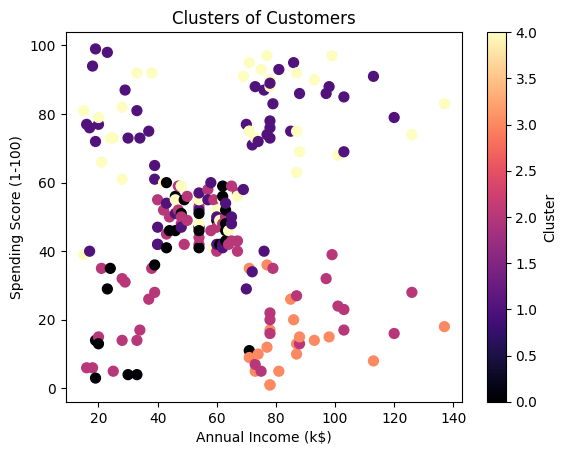

In [49]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='magma', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.colorbar(label='Cluster')
plt.show()

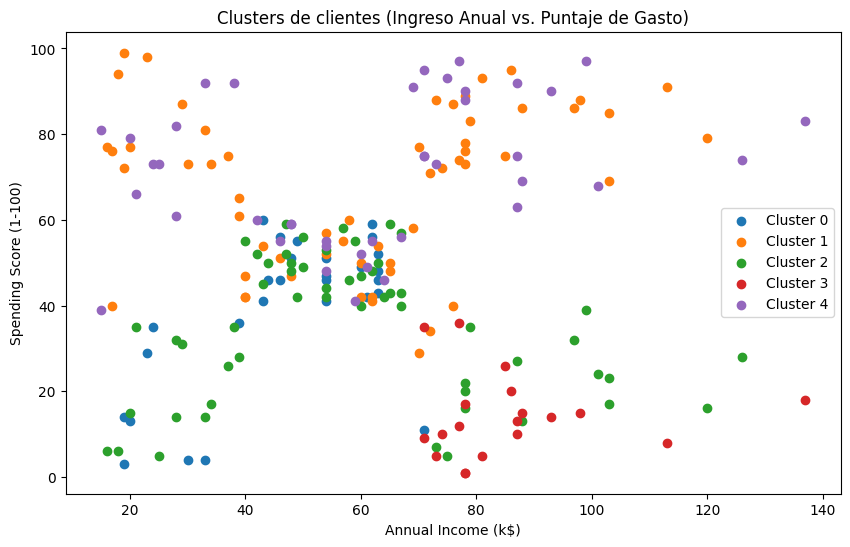

In [50]:
plt.figure(figsize=(10, 6))
for cluster_num in range(optimal_clusters):
    subset = data[data['Cluster'] == cluster_num]
    plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'], label=f'Cluster {cluster_num}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters de clientes (Ingreso Anual vs. Puntaje de Gasto)')
plt.legend()
plt.show()

####Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

####Respuesta:
En la gráfica se pueden identificar varios grupos visualmente diferenciados. Los clientes parecen agruparse de manera clara según su ingreso anual y su puntaje de gasto.
- Cluster 0 (color negro): Personas con ingresos bajos y puntajes de gasto bajos. Son clientes con bajo poder adquisitivo y comportamiento de consumo bajo.
- Cluster 1 (color rosa oscuro): Clientes con ingresos medios  y puntajes de gasto altos. Son compradores activos con buena capacidad de gasto.
- Cluster 2 (color morado oscuro): Personas con ingresos medios-altos, pero con puntajes de gasto bajos. Tienen buena capacidad económica, pero gastan poco.
- Cluster 3 (color naranja claro): Personas con ingresos altos pero con puntajes de gasto muy bajos. Son clientes con alto poder adquisitivo que no están gastando.
- Cluster 4 (color amarillo claro): Clientes con ingresos medios y puntajes de gasto muy altos. Son compradores frecuentes y valiosos para el negocio.

En general los clusters están bien definidos, lo que indica que el algoritmo K-means logró una segmentación adecuada de los clientes según su comportamiento de consumo.











####Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

####Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

####Respuesta:
Con base en las características promedio de edad, ingreso y puntaje de gasto de cada cluster, se podrían asignar los siguientes nombres:
- Cluster 0: Adultos Conservadores.
Justificación: Tienen mayor edad (57 años), ingreso medio-bajo (46k) y gasto moderado (38). Son clientes más maduros y prudentes con sus compras.
- Cluster 1: Jóvenes Gastadores.
Justificación: Son jóvenes (28 años), con ingreso medio (59k) y alto puntaje de gasto (67). Representan un perfil activo, impulsivo o fiel al consumo.
- Cluster 2: Consumidores Moderados.
Justificación: Edad media (48 años), ingreso medio-alto (58k) y gasto bajo-moderado (35). Tienen capacidad económica, pero consumen con medida.
- Cluster 3: Ricos Ahorradores.
Justificación: Jóvenes (38 años), alto ingreso (85k) pero bajo gasto (14). Aunque tienen alto poder adquisitivo, no lo reflejan en su consumo.
- Cluster 4: Jóvenes Premium.
Justificación: Jóvenes (28 años), ingreso medio-alto (61k) y alto gasto (71). Gastan mucho y podrían preferir productos exclusivos o de alta gama.